In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

## DATA - summary

### Import Housing Dataset 

In [1]:
path = "C:/Users/Asus/Data Case/heart_failure_clinical_records_dataset.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Get overall statistics for the data

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### Check for missing data

In [7]:
df.shape

(299, 13)

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### no missing data found

In [10]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
# change the columns' names
df.rename(columns={'age': 'Age', 'anaemia': 'Anaemia', 'creatinine_phosphokinase': 'Creatinine Phosphokinase', 'diabetes': 'Diabetes',
'ejection_fraction': 'Ejection Fraction', 'high_blood_pressure': 'High Blood Pressure', 'platelets': 'Platelets', 'serum_creatinine': 'Serum Creatinine',
'serum_sodium': 'Serum Sodium', 'sex': 'Sex', 'smoking': 'Smoking', 'time': 'Time',
'DEATH_EVENT': 'Death Event'}, inplace=True)

<!-- #     age: Age of the patient
#     anaemia: If the patient had the haemoglobin below the normal range
#     creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
#     diabetes: If the patient was diabetic
#     ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
#     high_blood_pressure: If the patient had hypertension
#     platelets: Platelet count of blood in kiloplatelets/mL
#     serum_creatinine: The level of serum creatinine in the blood in mg/dL
#     serum_sodium: The level of serum sodium in the blood in mEq/L
#     sex: The sex of the patient
#     smoking: If the patient smokes actively or ever did in past
#     time: It is the time of the patient's follow-up visit for the disease in months
#     DEATH_EVENT: If the patient deceased during the follow-up period -->

### Data Description
    age: Age of the patient
    anaemia: If the patient had the haemoglobin below the normal range
    creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
    diabetes: If the patient was diabetic
    ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
    high_blood_pressure: If the patient had hypertension
    platelets: Platelet count of blood in kiloplatelets/mL
    serum_creatinine: The level of serum creatinine in the blood in mg/dL
    serum_sodium: The level of serum sodium in the blood in mEq/L
    sex: The sex of the patient
    smoking: If the patient smokes actively or ever did in past
    time: It is the time of the patient's follow-up visit for the disease in months
    DEATH_EVENT: If the patient deceased during the follow-up period


### Basic Visualizations of the Dataset 

In [ ]:
# Correlation Map

<AxesSubplot:>

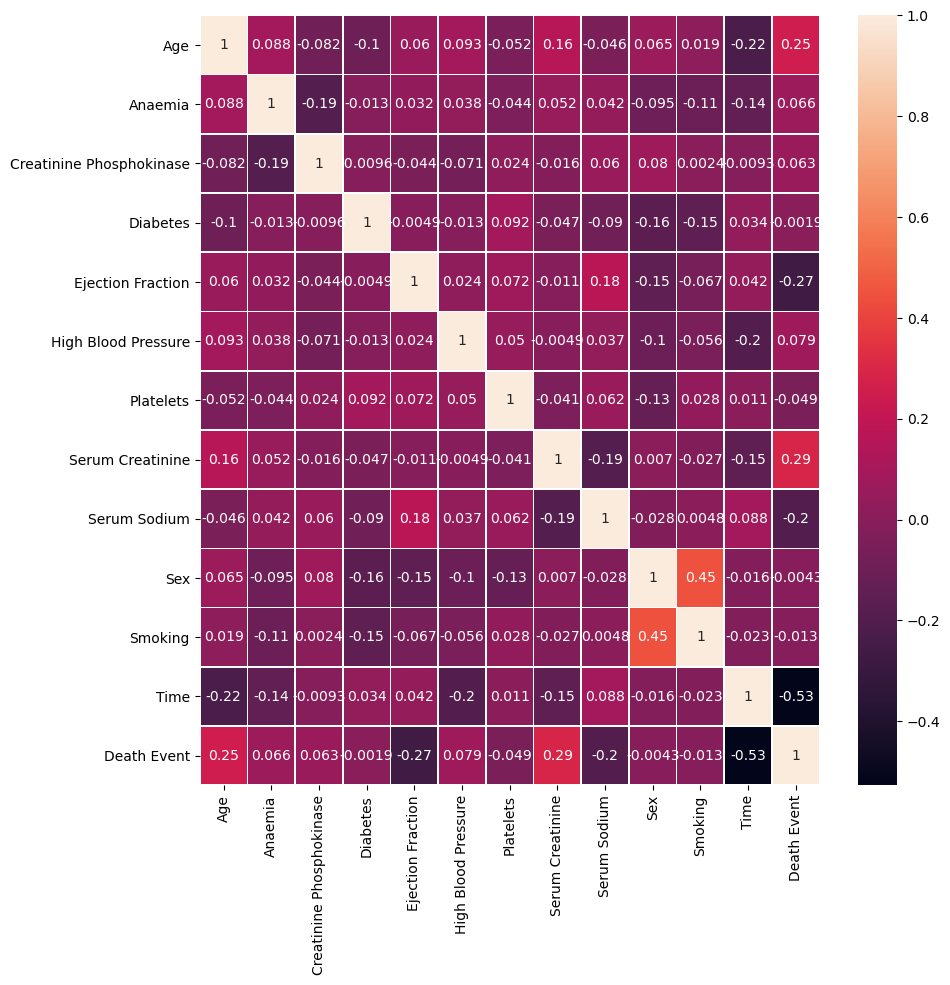

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

#### See some of the relations between price and the other variables

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


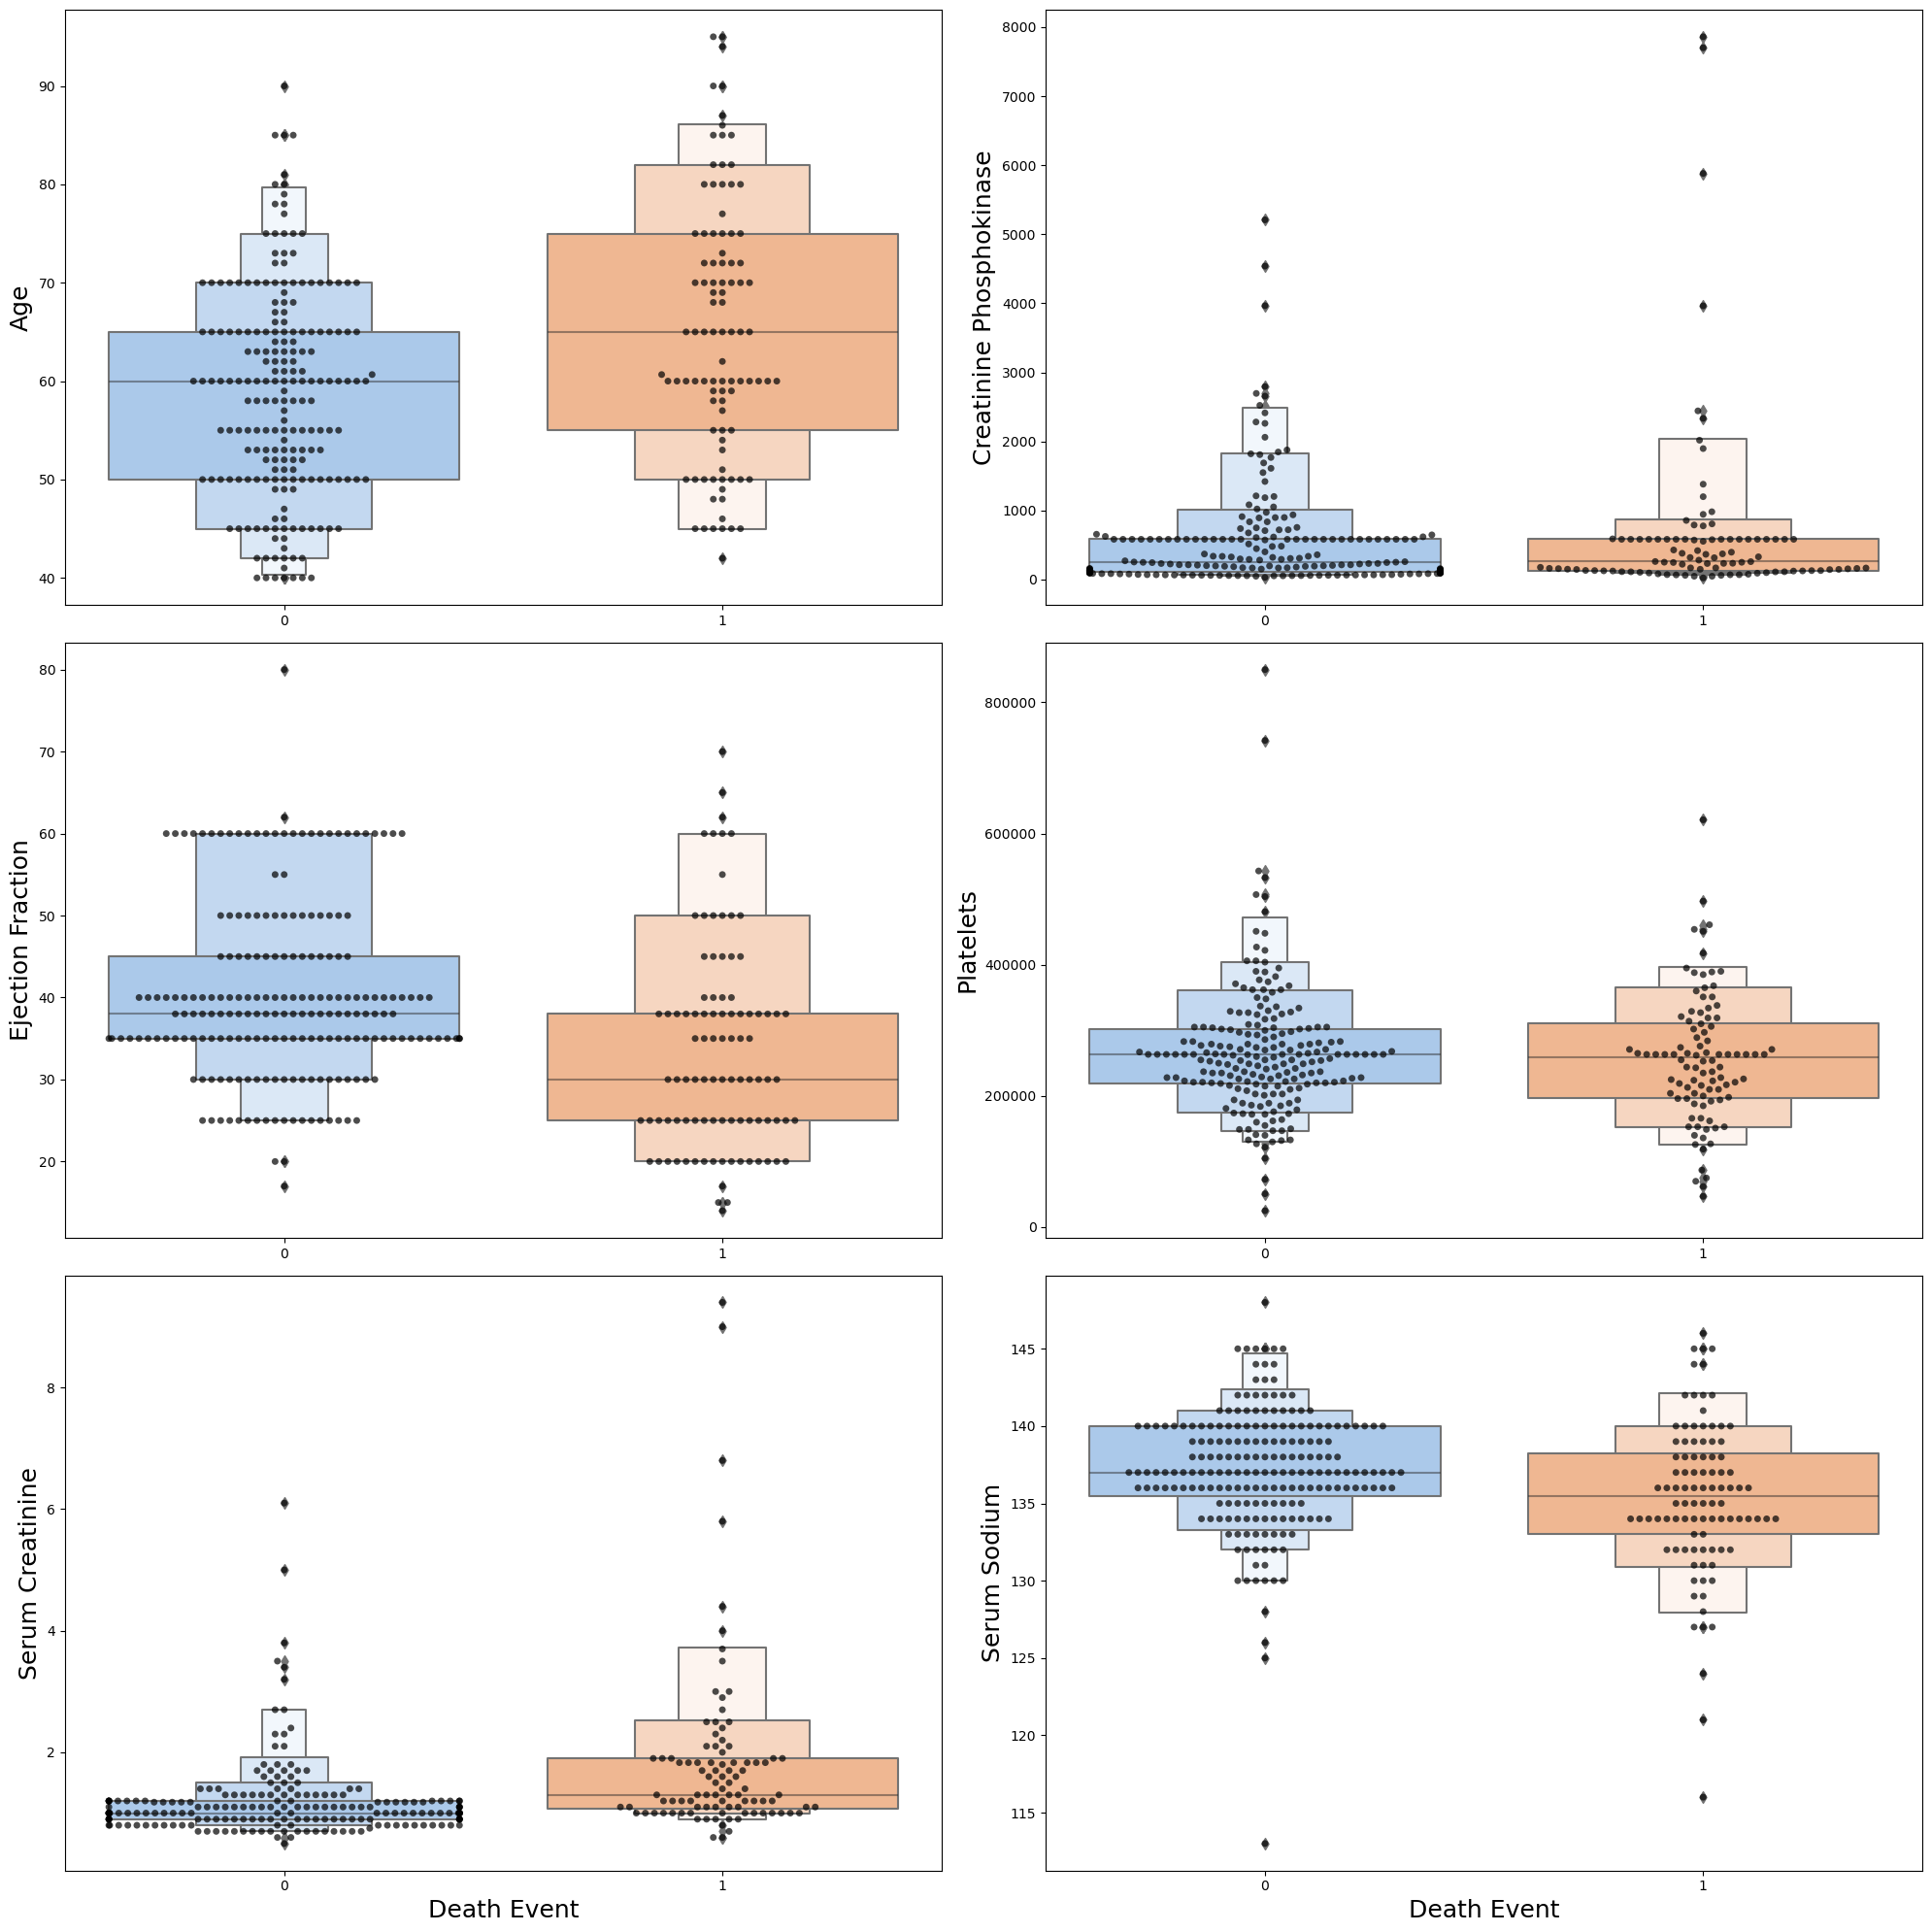

In [7]:

# Create a function to plot boxen and swarm plots
def plot_outliers(dataframe, features, target):
    cols = sns.color_palette("pastel")
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
    axs = axs.ravel()
    for i, feature in enumerate(features): 
        # Use swarmplot to show the distribution of data points
        sns.swarmplot(x=dataframe[target], y=dataframe[feature], color="black", alpha=0.7, ax=axs[i])
        # Use boxenplot to show the distribution of the data
        sns.boxenplot(x=dataframe[target], y=dataframe[feature], palette=cols, ax=axs[i])
        # axs[i].set_xlabel(target)
        axs[i].set_ylabel(feature)
        axs[i].set_xlabel('')
        # axs[i].set_title(f'{feature} by {target}')
        axs[i].set_ylabel(feature, fontsize = 18)
        if i in (4,5):
            axs[i].set_xlabel(target)
            axs[i].set_xlabel(target, fontsize = 18)
    plt.tight_layout()
    plt.savefig("outliers.png")
    plt.show() 

# Define the features and target variable
features = ["Age","Creatinine Phosphokinase","Ejection Fraction","Platelets","Serum Creatinine","Serum Sodium"]
target = "Death Event"

plot_outliers(df, features, target)

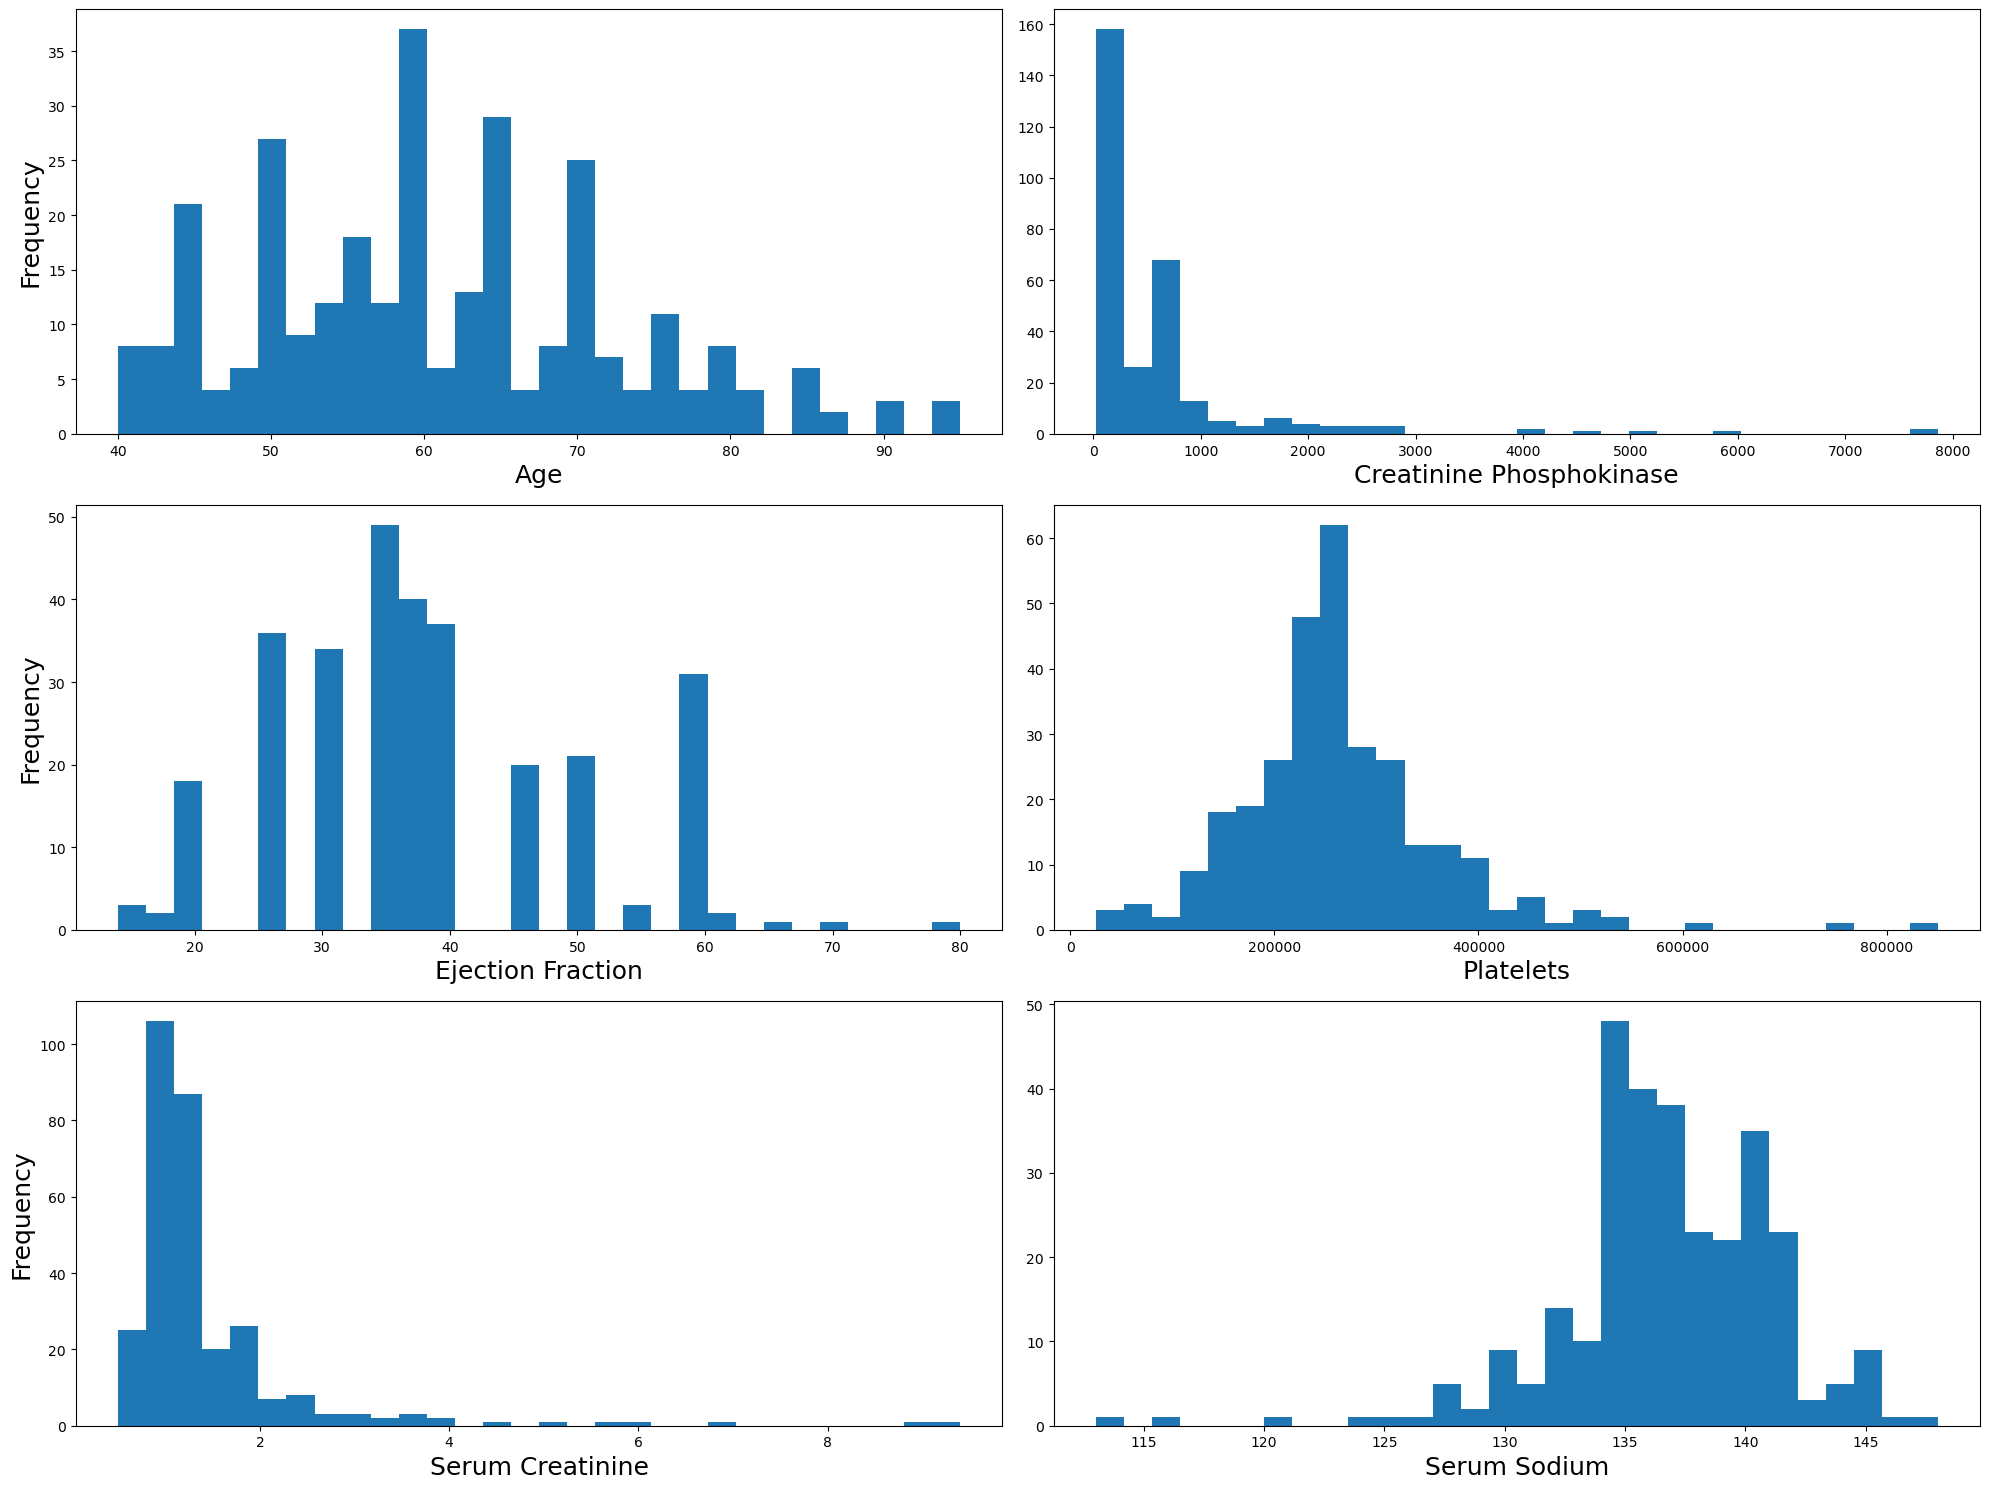

In [8]:
# ALL THE HISTORGAMS
# Get a list of all numerical columns in the dataset
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = ['Age','Creatinine Phosphokinase','Ejection Fraction','Platelets', 'Serum Creatinine','Serum Sodium']

# Determine the number of columns and rows for the subplots
ncols = 2
nrows = 3

# Create the figure and subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(20,15))

# Flatten the subplots array
axs = axs.ravel()

# Loop through each numerical column
for i, col in enumerate(num_cols):
    # Create a histogram of the column in the corresponding subplot
    axs[i].hist(df[col], bins = 30)
    # axs[i].set_title(col)
    axs[i].set_xlabel(col)
    if i % ncols == 0:
        axs[i].set_ylabel('Frequency')
        axs[i].set_ylabel('Frequency', fontsize = 18)
    axs[i].set_xlabel(col, fontsize = 18)
    

# Adjust the spacing between subplots
plt.tight_layout()
# plt.subplots_adjust(top=1.9, bottom=1.1, left=0.1, right=1.9)

# Show the figure
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

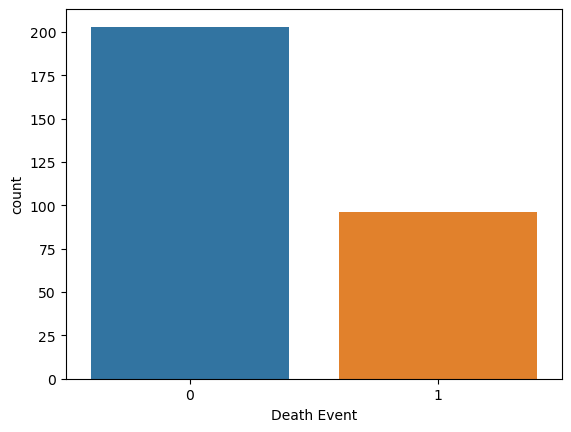

In [10]:
#Evaluating the target and finding out the potential skewness in the data
cols= ["#CD5C5C","#FF0000"]
ax = sns.countplot(x= df["Death Event"])
ax.bar_label(ax.containers[0])

### Assign X and y as Independent / Dependent variables

In [10]:
X = df.drop(['Death Event'], axis=1).values
y = df['Death Event'].values

In [11]:
X.shape, y.shape

((299, 12), (299,))

## Train / Test Data Split 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# test size is recommended to be around 0.2-0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### We standardize the X_train & X_test sets, because we don't want (due to outliers) some variables's distributions to affect the other's for the Linear Regression

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TO BE DELETED :

## Linear Regression

### To prepare the data for linear regression we need to:
    - assume linear relationship in our data
    - remove outliers (noise)
    - get rid of collinearity (can cause overfitting)
    - Standartization & Normalization of the data

In [ ]:
# Standartization of data is performed - we remove mean and scale to the variance
# the idea is to make the data to behave in a similar way
# because if some variable has variance much larger than the rest, 
# this might affect the learning from the features.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lin_reg = LinearRegression(normalize=True)

In [35]:
# Train the linear regression model
lin_reg.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [36]:
#evaluate the model (intercept and slope)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-2633398.418569545
[2.16473495e+01 1.65196273e+05 1.19400961e+05 2.08616775e+03
 1.52111788e+01]


In [37]:
y_lin_reg_pred = lin_reg.predict(X_test)

In [38]:
#compare actual output values with predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_lin_reg_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,1.339096e+06,1.308500e+06
1,1.251794e+06,1.236863e+06
2,1.340095e+06,1.244411e+06
3,1.431508e+06,1.228858e+06
4,1.042374e+06,1.061128e+06
5,1.555321e+06,1.542833e+06
6,1.250882e+06,1.094261e+06
7,1.039381e+06,8.330931e+05
8,8.324752e+05,7.886513e+05
9,1.420648e+06,1.469140e+06


In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, y_lin_reg_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_lin_reg_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_lin_reg_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_lin_reg_pred))

MAE: 80859.62543687767
MSE: 9940956140.796646
RMSE: 99704.34364056887
VarScore: 0.9170277397908635


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg = LogisticRegression()  
log_reg.fit(X_train, y_train)

LogisticRegression()

In [160]:
log_pred = (log_reg.predict(X_test)>0.6)

In [161]:
#compare actual output values with predicted values
df_logistic = pd.DataFrame({'Actual': y_test, 'Predicted': log_pred})
df_logistic.head()

,Actual,Predicted
0,0,False
1,0,False
2,1,False
3,1,True
4,0,False


In [162]:
(log_reg.predict_proba(X_test)>0.6)[:,1]

array([False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False,  True,  True,  True, False])

In [166]:
log_reg.score(X_train, y_train)

0.8803827751196173

Text(50.72222222222221, 0.5, 'Actual')

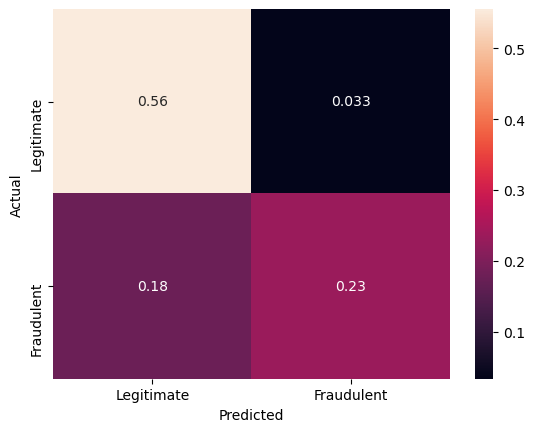

In [223]:
mat = confusion_matrix(y_test, log_pred)
labels_conf_mat = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat),annot=True, xticklabels=labels_conf_mat, yticklabels=labels_conf_mat)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### We can cross-validate because dataset is not that massive, which will allows us to estimate how well our model generalizes

In [32]:
from sklearn.model_selection import cross_val_score

In [39]:
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.9047619  0.76190476 0.95238095 0.9047619  0.9047619  0.95238095
 0.76190476 0.71428571 0.76190476 0.75      ]


In [40]:
model.score(X_test, y_test)

0.7888888888888889

In [41]:
scores.mean()

0.836904761904762

# Artificial Neural Network

In [42]:
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
import keras_tuner as kt

In [43]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

###### we initialize the number of columns, as they will be the input variables to the first layer

In [44]:
n_cols = X.shape[1]

##### Learning rate controls the weight at the end of each batch
##### momentum controls how much to let the previous update influence the current weight update.
##### Decay indicates the learning rate decay over each update 

Typical values for those hyperparameters are lr=0.01, decay=1e-6, momentum=0.9, and nesterov=True.

### ANN model function

In [45]:
# Prepare Data in an array format:
X_train = np.array(X_train)
# X_valid = np.array(X_valid)
y_train = np.array(y_train)
# y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

### Trained Hyperparameters:

#### Below we perform the training, and here we input the "best" parameters
##### This is just a sample we used for testing

In [209]:
model = Sequential()

#Input layer
model.add(Dense(n_cols, activation='relu', input_shape=(n_cols,)))

#First hidden layer
model.add(Dense(45, activation='relu'))

#Dropout rate - normally 0.2 is suggested
model.add(Dropout(0.3))

#First hidden layer
model.add(Dense(40, activation='relu'))

#Dropout rate - normally 0.2 is suggested
model.add(Dropout(0.3))

model.add(Flatten())

#Output layer

model.add(Dense(1, activation='sigmoid'))

# optimizer 
adam = Adam(learning_rate=0.001)

#first apply the optimizing method adam, mean_squared_error is preferreable for regression  tasks)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
# # Earlystopping will cut the training when the validation accuracy does not improve in N-consequtive epochs
# early_stopping = EarlyStopping(
#     min_delta=0.001, # minimium amount of change to count as an improvement
#     patience=20, # how many epochs to wait before stopping
#     restore_best_weights=True)

In [ ]:
#reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model")
# compile the model !:
reconstructed_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [210]:
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          batch_size=25,epochs=80)

Epoch 1/80
9/9 [==============================] - 1s 31ms/step - loss: 0.6446 - accuracy: 0.6699 - val_loss: 0.6665 - val_accuracy: 0.5778
Epoch 2/80
9/9 [==============================] - 0s 8ms/step - loss: 0.6154 - accuracy: 0.6794 - val_loss: 0.6678 - val_accuracy: 0.5889
Epoch 3/80
9/9 [==============================] - 0s 10ms/step - loss: 0.5574 - accuracy: 0.7273 - val_loss: 0.6759 - val_accuracy: 0.5889
Epoch 4/80
9/9 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.7321 - val_loss: 0.6801 - val_accuracy: 0.5889
Epoch 5/80
9/9 [==============================] - 0s 8ms/step - loss: 0.5211 - accuracy: 0.7464 - val_loss: 0.6776 - val_accuracy: 0.5889
Epoch 6/80
9/9 [==============================] - 0s 8ms/step - loss: 0.4986 - accuracy: 0.7512 - val_loss: 0.6695 - val_accuracy: 0.5889
Epoch 7/80
9/9 [==============================] - 0s 6ms/step - loss: 0.5353 - accuracy: 0.7416 - val_loss: 0.6622 - val_accuracy: 0.5889
Epoch 8/80
9/9 [================

Epoch 60/80
9/9 [==============================] - 0s 6ms/step - loss: 0.2293 - accuracy: 0.9234 - val_loss: 0.8332 - val_accuracy: 0.7667
Epoch 61/80
9/9 [==============================] - 0s 6ms/step - loss: 0.2208 - accuracy: 0.8995 - val_loss: 0.8495 - val_accuracy: 0.7667
Epoch 62/80
9/9 [==============================] - 0s 8ms/step - loss: 0.2266 - accuracy: 0.9187 - val_loss: 0.8750 - val_accuracy: 0.7667
Epoch 63/80
9/9 [==============================] - 0s 8ms/step - loss: 0.2230 - accuracy: 0.8995 - val_loss: 0.8886 - val_accuracy: 0.7667
Epoch 64/80
9/9 [==============================] - 0s 8ms/step - loss: 0.2183 - accuracy: 0.9187 - val_loss: 0.8525 - val_accuracy: 0.7556
Epoch 65/80
9/9 [==============================] - 0s 6ms/step - loss: 0.2067 - accuracy: 0.9139 - val_loss: 0.8528 - val_accuracy: 0.7556
Epoch 66/80
9/9 [==============================] - 0s 6ms/step - loss: 0.2076 - accuracy: 0.9043 - val_loss: 0.8822 - val_accuracy: 0.7556
Epoch 67/80
9/9 [==========

In [212]:
val_accuracy = np.mean(model.history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 71.96%


In [213]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                156       
                                                                 
 dense_8 (Dense)             (None, 45)                585       
                                                                 
 dropout_3 (Dropout)         (None, 45)                0         
                                                                 
 dense_9 (Dense)             (None, 40)                1840      
                                                                 
 dropout_4 (Dropout)         (None, 40)                0         
                                                                 
 flatten_2 (Flatten)         (None, 40)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 4

In [214]:
loss_df = pd.DataFrame(model.history.history)
loss_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [215]:
model_accuracy = loss_df['loss']
model_validation = loss_df['val_loss']
epochs = range(1, len(model_accuracy) + 1)

[]

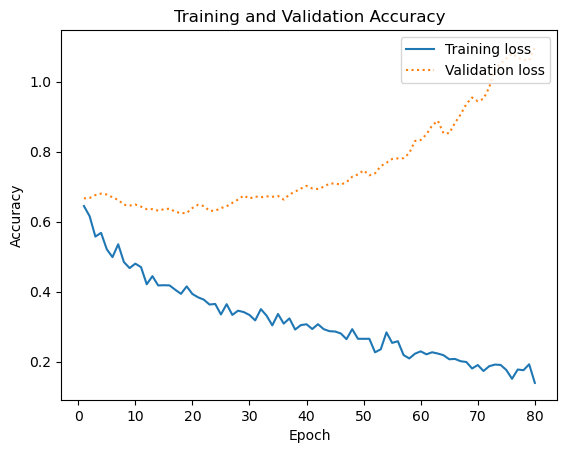

In [216]:
plt.plot(epochs, model_accuracy, '-', label='Training loss')
plt.plot(epochs, model_validation, ':', label='Validation loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.plot()

### Evaluation of the DATA

In [217]:
y_pred = reconstructed_model.predict(X_test)

3/3 [==============================] - 0s 8ms/step


(array([46.,  7.,  7.,  2.,  4.,  2.,  3.,  2.,  3., 14.]),
 array([4.0349154e-05, 9.9386841e-02, 1.9873334e-01, 2.9807985e-01,
        3.9742634e-01, 4.9677283e-01, 5.9611934e-01, 6.9546580e-01,
        7.9481232e-01, 8.9415878e-01, 9.9350530e-01], dtype=float32),
 <BarContainer object of 10 artists>)

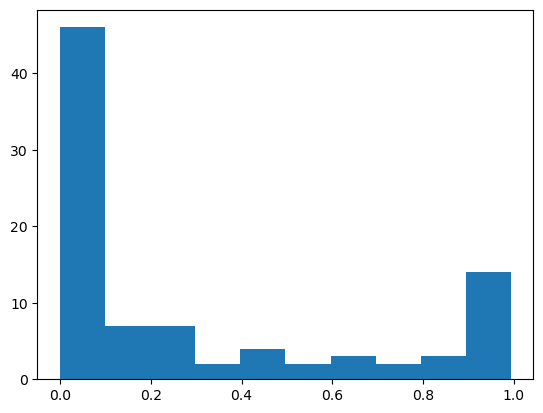

In [218]:
plt.hist(y_pred)

In [219]:
# Turn the prediction variable into binary
y_pred = (y_pred > 0.6)

In [220]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.25555555555555554
MSE: 0.25555555555555554
RMSE: 0.5055250296034367
VarScore: 0.05915349311575713


In [221]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.7444444444444445

#### Confustion MATRIX to vizualize performance of the model during testing

In [100]:
from sklearn.metrics import confusion_matrix

Text(50.72222222222221, 0.5, 'Actual')

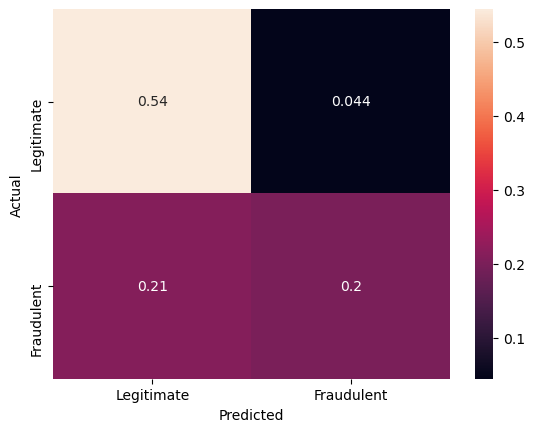

In [222]:
mat = confusion_matrix(y_test, y_pred)
labels_conf_mat = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat),annot=True, xticklabels=labels_conf_mat, yticklabels=labels_conf_mat)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Hyperparameter tuning

In [181]:
def build_model(hp):
    
    """
    This function build an ANN model.
    
    Param: hp: Hyperparameters that will be optimized
    
    The hyperparameters that will be optimized are:
    the number of layers,
    the number of neurons per layer,
    the dropout rate,
    the type of activation function,
    the learning rate.
    
    The function allows for different values for each parameter, constructs the ANN model using the Keras library and tensorflow.
    
    The function uses the ADAM optimizer and the Binary Crossentropy loss function
    
    Return: model ---> the function returns the best architecture based on its hyperparameters.    
    """
    
    
    dnn_layers_ss = [1,2]   # Number of layers
    dnn_units_min, dnn_units_max, step = 32, 64, 4 # number of neurons per layer
    dropout_ss = [0.1, 0.2, 0.3]  # dropout rate
    lr_ss = [0.001] # learning rate
    active_func_ss = ['relu', 'tanh'] #activation function
       
    # Combination of randomly picked hyperparameters:
    active_func = hp.Choice('activation', active_func_ss) # choose an activation function
    
    lr = hp.Choice('learning_rate', lr_ss) #chooses a learning rate within the given range
    
    dropout = hp.Choice('dropout', dropout_ss) # choose a dropout rate
    
    inputs = tf.keras.Input(shape=(n_cols,)) #creates an input layer with a shape, equal to number of columns. The idea is to have as much neurons in the input layer as variables
        
    flatten_layer = Flatten()(inputs) # Creates a 1-D array for the input layer
    
    # create hidden layers
    dnn_units = hp.Int(f"0_units", min_value=dnn_units_min, max_value=dnn_units_max) # chooses a number of neurons within the range for the hidden layers
    dense = tf.keras.layers.Dense(units=dnn_units, activation=active_func, use_bias=True, bias_initializer='ones')(flatten_layer) # creates layer with the specific number of neurons selected in the line above + sets the chosen activation function

    
    # Creating the architecture based on the upper randomly selected hyperparameters
    # loops through the number of chosen layers
    for layer_i in range(hp.Choice("n_layers", dnn_layers_ss)):
        # chooses a number of layers with the selected number of neurons from the previous line
        dnn_units = hp.Int(f"{layer_i}_units", min_value=dnn_units_min, max_value=dnn_units_max, step=step)
        dense = Dense(units=dnn_units, activation=active_func, use_bias=True, bias_initializer='ones')(dense)   
        # if the model performs better with a Dropout, it will add one after the hidden layer
        if hp.Boolean("dropout"):
            dense = Dropout(rate=dropout)(dense)
    
    # sets the output layer with 1 neuron since the function will estimate a regression, and will produce one value
    outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(dense)
    # build the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    # set optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
        
    # compile the model with chosen optimizer, loss function and metrics
    model.compile(optimizer=optimizer,
                 loss="binary_crossentropy",
                 metrics=['accuracy'])
    
    return model

In [182]:
#RandomSearch will take a combination of the hyperparameters that will be test, but not all possible ones. 
tuner1 = kt.RandomSearch(build_model, # the created ANN model
                        objective='val_accuracy',  # the metrics we are interested to observe
                        max_trials=200, # how many times we train the model
                        # The purpose of having multiple executions per trial is to reduce results variance and therefore be able to more accurately assess the performance of a model.
                        executions_per_trial=3, # we set 3 different weight initializations for each hyperparameter combination ,which basically trains the same model but achieves different results
                        overwrite=True, # overwrite file in same directory
                        project_name='ANN_samll_number_of_neurons',
                        directory='C:/Users/Asus/Data Case')

In [183]:
# EarlyStopping will allow the training cycle to end if there is no improvement in accuracy
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

In [184]:
# search is a function that will perform the model N-times (number of epochs) and will apply the combinations from the random search
# to find the best Hyperparameters

tuner1.search(X_train,y_train, epochs=100,batch_size=25, validation_data=(X_test, y_test), callbacks=[early_stopping])

Trial 200 Complete [00h 00m 13s]
val_accuracy: 0.8074073990186056

Best val_accuracy So Far: 0.8222222328186035
Total elapsed time: 00h 52m 15s
INFO:tensorflow:Oracle triggered exit


In [185]:
tuner1.get_best_hyperparameters()

In [186]:
tuner1.results_summary()

Results summary
Results in C:/Users/Asus/Data Case\ANN_samll_number_of_neurons
Showing 10 best trials
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
dropout: 0.3
0_units: 45
n_layers: 1
1_units: 40
Score: 0.8222222328186035
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
dropout: 0.2
0_units: 60
n_layers: 1
1_units: 56
Score: 0.8222222328186035
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
dropout: 0.3
0_units: 49
n_layers: 2
1_units: 48
Score: 0.8222222328186035
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
dropout: 0.2
0_units: 45
n_layers: 1
1_units: 60
Score: 0.8222222328186035
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
dropout: 0.2
0_units: 48
n_layers: 2
1_units: 32
Score: 0.8222222129503886
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
dropout: 0.3
0_units: 42
n_layers: 2
1_units: 52
Score: 0.8222222129503886
Trial summary
Hyperparameters:
act

In [187]:
best_model = build_model(tuner1.get_best_hyperparameters(1)[0])

In [208]:
best_model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=25,epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0556 - accuracy: 0.9856 - val_loss: 1.0368 - val_accuracy: 0.7667
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0700 - accuracy: 0.9713 - val_loss: 1.0247 - val_accuracy: 0.7333
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0613 - accuracy: 0.9856 - val_loss: 1.0454 - val_accuracy: 0.7444
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0712 - accuracy: 0.9856 - val_loss: 1.0621 - val_accuracy: 0.7556
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0408 - accuracy: 0.9904 - val_loss: 1.0764 - val_accuracy: 0.7667
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0691 - accuracy: 0.9809 - val_loss: 1.0729 - val_accuracy: 0.7667
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0515 - accuracy: 0.9809 - val_loss: 1.0722 - val_accuracy: 0.7556
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 6ms/step - loss: 0.0426 - accuracy: 0.9856 - val_loss: 1.1793 - val_accuracy: 0.7444
Epoch 60/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0466 - accuracy: 0.9904 - val_loss: 1.2019 - val_accuracy: 0.7556
Epoch 61/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 1.2266 - val_accuracy: 0.7556
Epoch 62/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0522 - accuracy: 0.9904 - val_loss: 1.2264 - val_accuracy: 0.7556
Epoch 63/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0402 - accuracy: 0.9904 - val_loss: 1.1998 - val_accuracy: 0.7556
Epoch 64/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0556 - accuracy: 0.9809 - val_loss: 1.1946 - val_accuracy: 0.7556
Epoch 65/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0356 - accuracy: 0.9904 - val_loss: 1.2137 - val_accuracy: 0.7556
Epoch 66/100
9/9 [===============

In [125]:
# SAVE the model:

In [189]:
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
best_model.save("ann_small")

INFO:tensorflow:Assets written to: ann_small\assets


In [191]:
#reconstruct the model identically.
reconstructed_model = tf.keras.models.load_model("ann_small/")

In [137]:
# Test loaded model
# np.testing.assert_allclose(
#     model.predict(X_test), reconstructed_model.predict(X_test)
# )

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(X_train, y_train)

7/7 [==============================] - 2s 6ms/step - loss: 0.1899 - accuracy: 0.9234


In [204]:
loss_df = pd.DataFrame(best_model.history.history)
loss_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [205]:
model_loss = loss_df['loss']
model_val_loss = loss_df['val_loss']
epochs = range(1, len(model_accuracy) + 1)
model_accuracy = loss_df['accuracy']
model_acc_val = loss_df['val_accuracy']

[]

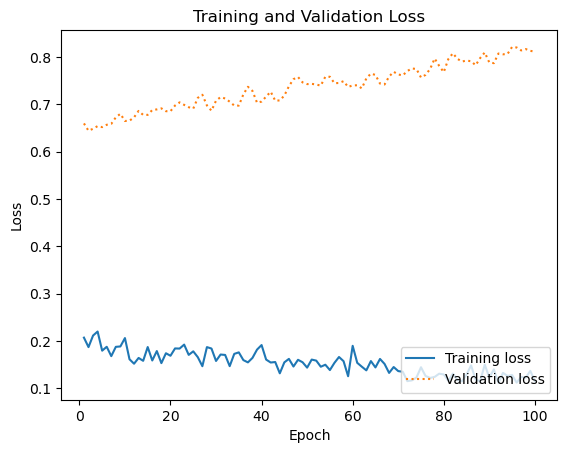

In [206]:
plt.plot(epochs, model_loss, '-', label='Training loss')
plt.plot(epochs, model_val_loss, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.plot()

[]

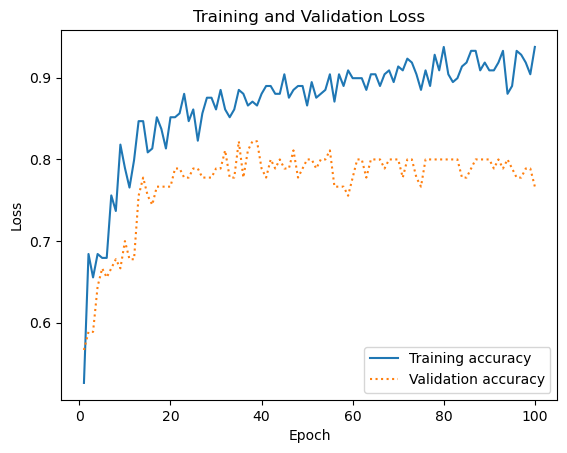

In [196]:
plt.plot(epochs, model_accuracy, '-', label='Training accuracy')
plt.plot(epochs, model_acc_val, ':', label='Validation accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.plot()

In [197]:
y_pred_opt = best_model.predict(X_test)
# Turn the prediction variable into binary
y_pred = (y_pred_opt > 0.6)

3/3 [==============================] - 0s 0s/step


In [198]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_opt))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred_opt))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_opt)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred_opt))

MAE: 0.26787549707235786
MSE: 0.18684559345186613
RMSE: 0.4322563978148457
VarScore: 0.2782132527948842


Text(50.72222222222221, 0.5, 'Actual')

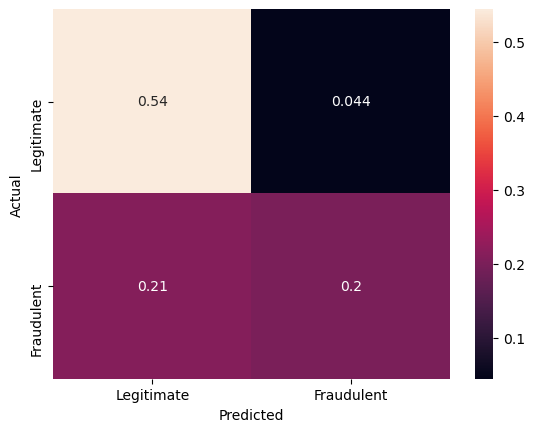

In [199]:
mat = confusion_matrix(y_test, y_pred)
labels_conf_mat = ['Legitimate', 'Fraudulent']
sns.heatmap(mat/np.sum(mat),annot=True, xticklabels=labels_conf_mat, yticklabels=labels_conf_mat)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [200]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [201]:
rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, y_pred)

In [202]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        53
           1       0.82      0.49      0.61        37

    accuracy                           0.74        90
   macro avg       0.77      0.71      0.71        90
weighted avg       0.76      0.74      0.73        90



# Testing the created Model:

### First, we will upload the saved model:

In [168]:
# It can be used to reconstruct the model identically.
model_test = tf.keras.models.load_model("my_model")

In [171]:
model_test.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=25,epochs=100)

Epoch 1/100
9/9 [==============================] - 2s 66ms/step - loss: 0.1789 - accuracy: 0.9426 - val_loss: 0.9797 - val_accuracy: 0.7444
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 0.1543 - accuracy: 0.9282 - val_loss: 0.9005 - val_accuracy: 0.7667
Epoch 3/100
9/9 [==============================] - 0s 17ms/step - loss: 0.1343 - accuracy: 0.9569 - val_loss: 1.0150 - val_accuracy: 0.7444
Epoch 4/100
9/9 [==============================] - 0s 17ms/step - loss: 0.1561 - accuracy: 0.9474 - val_loss: 0.9614 - val_accuracy: 0.7556
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 0.1396 - accuracy: 0.9282 - val_loss: 0.9172 - val_accuracy: 0.7667
Epoch 6/100
9/9 [==============================] - 0s 15ms/step - loss: 0.1627 - accuracy: 0.9378 - val_loss: 1.0646 - val_accuracy: 0.7444
Epoch 7/100
9/9 [==============================] - 0s 17ms/step - loss: 0.1583 - accuracy: 0.9330 - val_loss: 0.9307 - val_accuracy: 0.7556
Epoch 8/100
9/9 [===

9/9 [==============================] - 0s 15ms/step - loss: 0.0732 - accuracy: 0.9713 - val_loss: 1.4367 - val_accuracy: 0.7111
Epoch 60/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0882 - accuracy: 0.9617 - val_loss: 1.5673 - val_accuracy: 0.7000
Epoch 61/100
9/9 [==============================] - 0s 26ms/step - loss: 0.0759 - accuracy: 0.9713 - val_loss: 1.3948 - val_accuracy: 0.7111
Epoch 62/100
9/9 [==============================] - 0s 16ms/step - loss: 0.0615 - accuracy: 0.9713 - val_loss: 1.4058 - val_accuracy: 0.7222
Epoch 63/100
9/9 [==============================] - 0s 14ms/step - loss: 0.0688 - accuracy: 0.9761 - val_loss: 1.5067 - val_accuracy: 0.7333
Epoch 64/100
9/9 [==============================] - 0s 17ms/step - loss: 0.0673 - accuracy: 0.9809 - val_loss: 1.4694 - val_accuracy: 0.7222
Epoch 65/100
9/9 [==============================] - 0s 19ms/step - loss: 0.0615 - accuracy: 0.9665 - val_loss: 1.5878 - val_accuracy: 0.7111
Epoch 66/100
9/9 [========

In [172]:
loss_df = pd.DataFrame(model_test.history.history)
loss_df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

[]

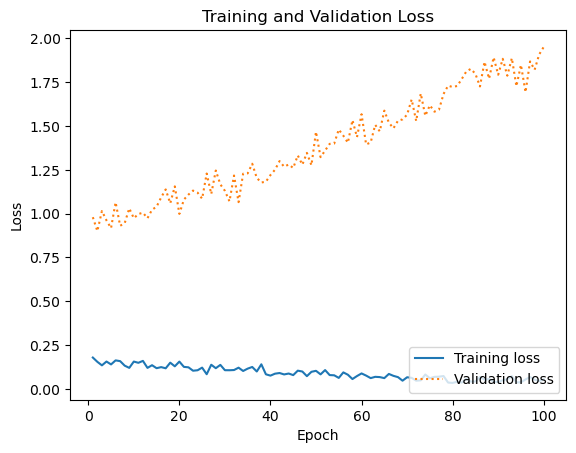

In [173]:
model_accuracy = loss_df['loss']
model_validation = loss_df['val_loss']
epochs = range(1, len(model_accuracy) + 1)
plt.plot(epochs, model_accuracy, '-', label='Training loss')
plt.plot(epochs, model_validation, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.plot()

### Second, we will use Cross-Validation since the dataset is small and we want to validate the accuracy of the model by finding the mean accuracy

In [68]:
from sklearn.model_selection import KFold, cross_val_score

In [70]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [71]:
accuracy_ann = cross_val_score(estimator=ann_final_model,
                              x=X_train,
                              y=y_train,
                              cv=kf)

TypeError: cross_val_score() got an unexpected keyword argument 'x'